In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

import requests 
from bs4 import BeautifulSoup
url = 'https://www.yonhapnewstv.co.kr/category/news/politics/feed/'
response = requests.get(url)
soup = BeautifulSoup(response.content,"xml")
link_list = soup.select('item link')

news = []
for link in link_list:
    news_url = link.text
    news_response = requests.get(news_url)    
    news_soup = BeautifulSoup(news_response.content,"html.parser")
    news_content = news_soup.select_one(".detail")
    news_n = kkma.nouns(news_content.text)
    news_nouns = filter(lambda word : len(word)>1 , news_n)
    news.append(list(news_nouns))
    
result = []
for i in range(len(news)):
    result.extend(news[i])
result= " ".join(result)

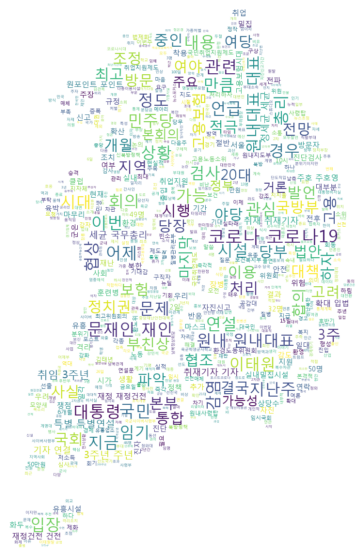

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from wordcloud import STOPWORDS # 불용어 사전 
import numpy as np

stop_word = set(["연합뉴스","연합","기사문의","문의","앵커","기자","기자문의",
                "뉴스","제보","닫기","기사","보도","라인","오늘","시간"])

from PIL import Image
img = Image.open("south_korea_4x.png").convert("RGBA")
 # 이미지 화소 하나를rgba로읽음  # rgba 로 불러줄때 바꿔주지 않으면 흑백이 됨. 
mask_ar = np.array(img)


result_w = WordCloud(background_color="white",
                  max_words=1000,stopwords = stop_word,
                 font_path="C:\Windows/Fonts/Malgun.ttf", # 한글이 안깨지게 하기위한 처리
                  random_state =42, relative_scaling=0.2, mask = mask_ar)
result_w.generate(result)

plt.figure(figsize=(15,10))
plt.imshow(result_w, interpolation="bilinear") 
plt.axis("off") # 워드클라우드의 축 눈금과 레이블을 표시안함 
plt.show()